## Pruebas del modulo de acceso a los datos de contador

In [1]:
import pandas as pd
from kwhmeter import suministro,contador, timezone, append_prices, read_config
from datetime import datetime, timedelta
import seaborn as sns


In [2]:
credenciales=read_config()
connection = contador(**credenciales['paconavas'])
#connection = contador(iberdrola,user,password)  #equivalente
#connection = suministro('alarcon')  #equivalente

INFO:root:Existen 25 facturas. Desde: 2021-01-20 00:00:00+01:00 hasta:2023-01-23 00:00:00+01:00


In [3]:

to_day = timezone.localize(datetime(2023,1,19)-timedelta(days=0))
from_day=to_day-timedelta(days=3)

print(f'Recuperando datos desde: {from_day} hasta:{to_day}')


Recuperando datos desde: 2023-01-16 00:00:00+01:00 hasta:2023-01-19 00:00:00+01:00


In [4]:
facturas=connection.facturas()
facturas

,fechaInicio,fechaFin,numero
factura,,,
2023-01-23,2023-01-09 00:00:00+01:00,2023-01-23 00:00:00+01:00,3230123030362980
2023-01-09,2022-12-22 00:00:00+01:00,2023-01-09 00:00:00+01:00,3230109030312833
2022-12-22,2022-11-22 00:00:00+01:00,2022-12-22 00:00:00+01:00,3221222030362782
2022-11-22,2022-10-21 00:00:00+02:00,2022-11-22 00:00:00+01:00,3221122030323849
2022-10-21,2022-09-27 00:00:00+02:00,2022-10-21 00:00:00+02:00,3221021030346154
2022-09-27,2022-07-26 00:00:00+02:00,2022-09-27 00:00:00+02:00,3220927030337878
2022-07-26,2022-06-23 00:00:00+02:00,2022-07-26 00:00:00+02:00,3220726030358467
2022-06-28,2022-05-23 00:00:00+02:00,2022-06-23 00:00:00+02:00,3220628030327990
2022-05-23,2022-04-22 00:00:00+02:00,2022-05-23 00:00:00+02:00,3220523030347163


In [5]:
cc=connection.consumo(from_day,to_day)
##cc=connection.consumo_facturado(['2023-01-25'])
cc=append_prices(cc)


ERROR:root:no existen los periodos de facturas especificados: []
INFO:root:recovering missing dates:0


In [6]:
cc

,factura,consumo,tipo,periodo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
fecha,,,,,,,,,,
2023-01-16 00:00:00+01:00,en curso,131.0,R,P3,46.11,-1.52,3.18,0.006040,-0.000199,0.000417
2023-01-16 01:00:00+01:00,en curso,125.0,R,P3,26.74,-1.27,3.18,0.003342,-0.000159,0.000398
2023-01-16 02:00:00+01:00,en curso,65.0,R,P3,26.49,-1.49,3.18,0.001722,-0.000097,0.000207
2023-01-16 03:00:00+01:00,en curso,129.0,R,P3,29.26,-1.81,3.18,0.003775,-0.000233,0.000410
2023-01-16 04:00:00+01:00,en curso,51.0,R,P3,31.28,-1.59,3.18,0.001595,-0.000081,0.000162
...,...,...,...,...,...,...,...,...,...,...
2023-01-18 20:00:00+01:00,en curso,63.0,R,P1,217.69,0.15,72.99,0.013714,0.000009,0.004598
2023-01-18 21:00:00+01:00,en curso,302.0,R,P1,238.70,0.53,72.99,0.072087,0.000160,0.022043
2023-01-18 22:00:00+01:00,en curso,278.0,R,P1,211.25,0.11,72.99,0.058728,0.000031,0.020291


<AxesSubplot:xlabel='fecha'>

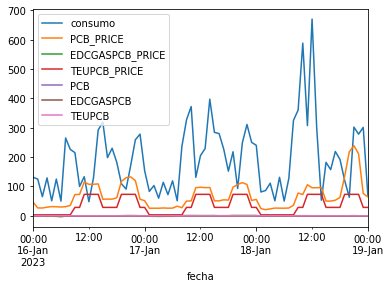

In [7]:
cc.plot()

In [8]:
cc.to_csv('consumos.csv',decimal=',')


In [9]:
totales=cc.groupby(['factura'])[['consumo','PCB','EDCGASPCB','TEUPCB']].sum()
totales

,consumo,PCB,EDCGASPCB,TEUPCB
factura,,,,
en curso,14000.0,1.056687,0.000971,0.553766


In [10]:
cc['2022-08-25':'2022-09-30']['consumo'].sum()+cc['2022-10-01':'2022-10-24']['consumo'].sum()

0.0

In [11]:
cc.groupby(['factura','tipo']).sum()

<ipython-input-11-4a6b15d68e66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','tipo']).sum()


,,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
factura,tipo,,,,,,,
en curso,R,14000.0,5058.42,-15.92,2516.94,1.056687,0.000971,0.553766


In [12]:
cc.groupby(['factura','periodo']).sum()

<ipython-input-12-3d54d8d27882>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','periodo']).sum()


consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE       PCB  \
factura  periodo                                                                
en curso P1        5158.0    2939.06             9.89       1751.76  0.619927   
         P2        5875.0    1407.89             4.03        685.68  0.348880   
         P3        2967.0     711.47           -29.84         79.50  0.087880   

                  EDCGASPCB    TEUPCB  
factura  periodo                       
en curso P1        0.002301  0.376482  
         P2        0.001479  0.167849  
         P3       -0.002810  0.009435

In [13]:
cc.groupby(['factura','periodo','tipo']).sum()

consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura  periodo tipo                                                      
en curso P1      R      5158.0    2939.06             9.89       1751.76   
         P2      R      5875.0    1407.89             4.03        685.68   
         P3      R      2967.0     711.47           -29.84         79.50   

                            PCB  EDCGASPCB    TEUPCB  
factura  periodo tipo                                 
en curso P1      R     0.619927   0.002301  0.376482  
         P2      R     0.348880   0.001479  0.167849  
         P3      R     0.087880  -0.002810  0.009435

<ipython-input-14-f9d6a7d50a59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')


<AxesSubplot:xlabel='factura', ylabel='consumo'>

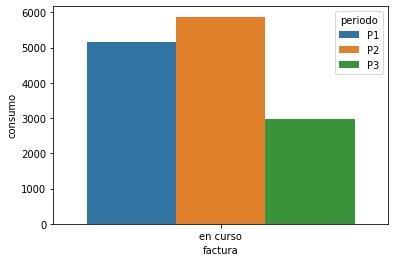

In [14]:
sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')